# Exercise 1. #

Equation for F:
F = -alpha*beta*k_bar**(alpha - 1)/(k_bar - k_bar**alpha)

Equation for G:
G = alpha*beta*k_bar**(alpha - 2)*(alpha*k_bar + k_bar**alpha)/(k_bar - k_bar**alpha)

Equation for H:
H = -alpha**2*beta*k_bar**(2*alpha - 2)/(k_bar - k_bar**alpha)

Equation for L:
L = alpha*beta*k_bar**alpha/(k_bar - k_bar**alpha)

Equation for M:
M = -alpha*beta*k_bar**(2*alpha - 1)/(k_bar - k_bar**alpha)

Equation for N:
N = rho

Equation for P:
P = k_bar**(-alpha + 1)*(alpha*beta*k_bar**(alpha - 2)*(alpha*k_bar + k_bar**alpha) + (alpha**2*beta**2*(-4*alpha*k_bar**(3*alpha - 3) + k_bar**(2*alpha - 4)*(alpha*k_bar + k_bar**alpha)**2)/(k_bar - k_bar**alpha)**2)**0.5*(k_bar - k_bar**alpha))/(2*alpha*beta)

Equation for Q:
Q = 2*alpha*beta*(k_bar**alpha*rho - k_bar**(2*alpha - 1))/(-alpha*beta*k_bar**(alpha - 2)*(alpha*k_bar + k_bar**alpha) + 2*alpha*beta*k_bar**(alpha - 1)*rho + (alpha**2*beta**2*(-4*alpha*k_bar**(3*alpha - 3) + k_bar**(2*alpha - 4)*(alpha*k_bar + k_bar**alpha)**2)/(k_bar - k_b

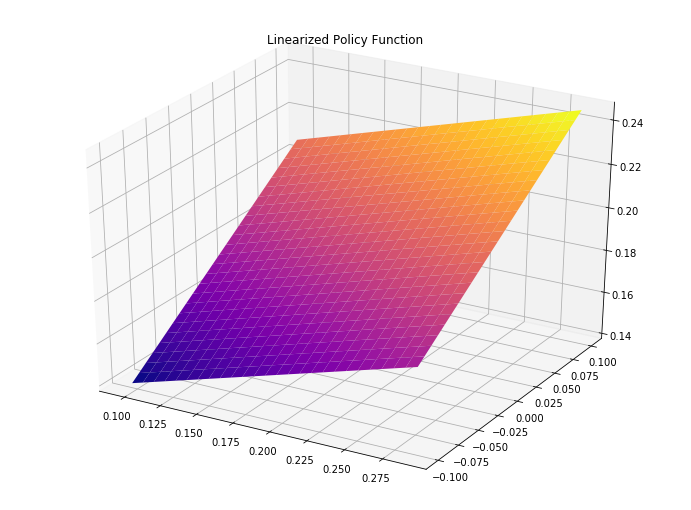

In [64]:
#Imports:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Parameter values:
alpha = 0.35
beta = 0.98
rho = 0.95
sigma = 0.02

#Get steady state values:
k_bar = (alpha * beta) ** (1 / (1 - alpha))
z_bar = 0

#Get symbols:
k_double_prime = sy.symbols('k_double_prime')
k_prime = sy.symbols('k_prime')
k = sy.symbols('k')
z_prime = sy.symbols('z_prime')
z = sy.symbols('z')
alpha_sy = sy.symbols('alpha')
beta_sy = sy.symbols('beta')
rho_sy = sy.symbols('rho')
k_bar_sy = sy.symbols('k_bar')

#Define gamma function:
def gamma(k_double_prime, k_prime, k, z_prime, z, alpha_sy, beta_sy):
    numerator = beta_sy * alpha_sy * sy.exp(z_prime) * (k_prime ** (alpha_sy - 1)) * (sy.exp(z) * (k ** alpha_sy) - k_prime)
    denominator = sy.exp(z_prime) * (k_prime ** alpha_sy) - k_double_prime
    return numerator / denominator

#Get equations for F, G, H, L and M as symbolic derivatives evaluated at the steady state:
F_eq = sy.simplify(sy.diff(gamma(k_double_prime, k_prime, k, z_prime, z, alpha_sy, beta_sy), k_double_prime).subs([(k_double_prime, k_bar_sy), (k_prime, k_bar_sy), (k, k_bar_sy), (z_prime, z_bar), (z, z_bar)]))
G_eq = sy.simplify(sy.diff(gamma(k_double_prime, k_prime, k, z_prime, z, alpha_sy, beta_sy), k_prime).subs([(k_double_prime, k_bar_sy), (k_prime, k_bar_sy), (k, k_bar_sy), (z_prime, z_bar), (z, z_bar)]))
H_eq = sy.simplify(sy.diff(gamma(k_double_prime, k_prime, k, z_prime, z, alpha_sy, beta_sy), k).subs([(k_double_prime, k_bar_sy), (k_prime, k_bar_sy), (k, k_bar_sy), (z_prime, z_bar), (z, z_bar)]))
L_eq = sy.simplify(sy.diff(gamma(k_double_prime, k_prime, k, z_prime, z, alpha_sy, beta_sy), z_prime).subs([(k_double_prime, k_bar_sy), (k_prime, k_bar_sy), (k, k_bar_sy), (z_prime, z_bar), (z, z_bar)]))
M_eq = sy.simplify(sy.diff(gamma(k_double_prime, k_prime, k, z_prime, z, alpha_sy, beta_sy), z).subs([(k_double_prime, k_bar_sy), (k_prime, k_bar_sy), (k, k_bar_sy), (z_prime, z_bar), (z, z_bar)]))

#Get equation for N:
N_eq = rho_sy

#Define P and Q in terms of F, G, H, L, M and N:
def get_P(F, G, H):
    return (-G - (G ** 2 - 4 * F * H) ** 0.5) / (2 * F)

def get_Q(F, G, H, L, M, N):
    return -(L * N + M) / (F * N + F * get_P(F, G, H) + G)

#Get equations for P and Q:
P_eq = sy.simplify(get_P(F_eq, G_eq, H_eq))
Q_eq = sy.simplify(get_Q(F_eq, G_eq, H_eq, L_eq, M_eq, N_eq))
    
print('Equation for F:\nF = {}\n\nEquation for G:\nG = {}\n\nEquation for H:\nH = {}\n\nEquation for L:\nL = {}\n\n'
      'Equation for M:\nM = {}\n\nEquation for N:\nN = {}\n\nEquation for P:\nP = {}\n\nEquation for Q:\nQ = {}\n'.format(F_eq, G_eq, H_eq, L_eq, M_eq, N_eq, P_eq, Q_eq))

#Get values for P and Q:
P = sy.lambdify((k_bar_sy, alpha_sy, beta_sy), P_eq)(k_bar, alpha, beta)
Q = sy.lambdify((k_bar_sy, alpha_sy, beta_sy, rho_sy), Q_eq)(k_bar, alpha, beta, rho)

#Get grids:
k_grid = np.linspace(0.5 * k_bar, 1.5 * k_bar, 26)
z_grid = np.linspace(-5 * sigma, 5 * sigma, 26)
H = np.zeros((26, 26))

#Define policy function:
def pf(k, z):
    return k_bar + P * (k - k_bar) + Q * z

#Update policy function grid:
for i in range(26): #loop over k indices
    for j in range(26): #loop over z indices
        H[i, j] = pf(k_grid[i], z_grid[j])

#Plot policy function:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(k_grid, z_grid)
ax.plot_surface(X, Y, H, cmap='plasma')
plt.title("Linearized Policy Function")
plt.show()

#Save H grid for Exercise 2:
H_old = H

# Exercise 2. #

Equation for F:
F = -1.0*alpha*beta*exp(k_bar)**alpha/(exp(k_bar) - exp(k_bar)**alpha)

Equation for G:
G = 1.0*alpha*beta*(alpha*exp(k_bar) + exp(k_bar)**alpha)*exp(-k_bar)*exp(k_bar)**alpha/(exp(k_bar) - exp(k_bar)**alpha)

Equation for H:
H = -1.0*alpha**2*beta*exp(-k_bar)*exp(k_bar)**(2*alpha)/(exp(k_bar) - exp(k_bar)**alpha)

Equation for L:
L = 1.0*alpha*beta*exp(k_bar)**alpha/(exp(k_bar) - exp(k_bar)**alpha)

Equation for M:
M = -1.0*alpha*beta*exp(-k_bar)*exp(k_bar)**(2*alpha)/(exp(k_bar) - exp(k_bar)**alpha)

Equation for N:
N = rho

Equation for P:
P = (0.5*alpha*beta*(alpha*exp(k_bar) + exp(k_bar)**alpha)*exp(k_bar)**alpha + 0.5*(alpha**2*beta**2*(-4.0*alpha*exp(k_bar)*exp(k_bar)**alpha + 1.0*(alpha*exp(k_bar) + exp(k_bar)**alpha)**2)*exp(-2*k_bar)*exp(k_bar)**(2*alpha)/(exp(k_bar) - exp(k_bar)**alpha)**2)**0.5*(-exp(k_bar) + exp(k_bar)**alpha)*exp(k_bar))*exp(-k_bar)*exp(k_bar)**(-alpha)/(alpha*beta)

Equation for Q:
Q = 1.0*alpha*beta*(-rho*exp(k_bar) + exp(k_bar)**alpha)*

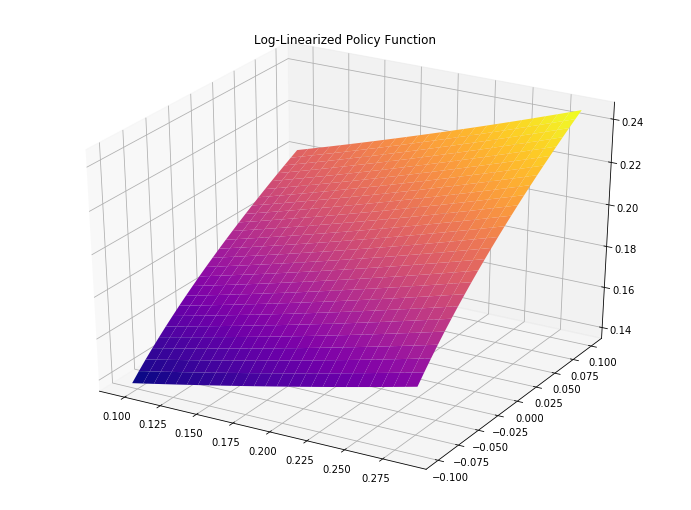

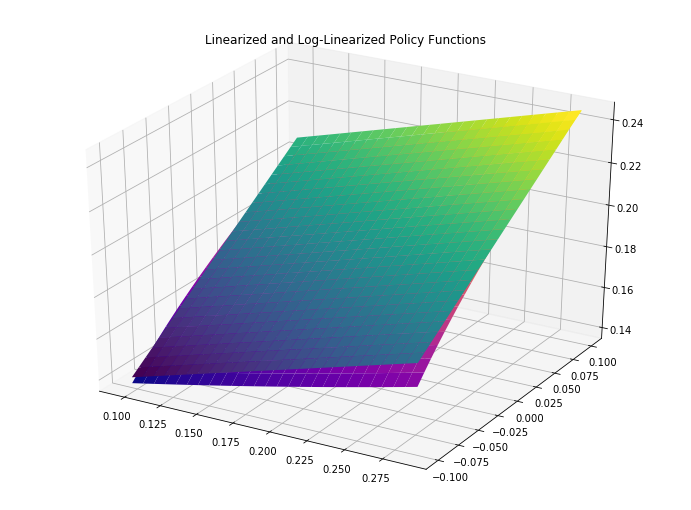

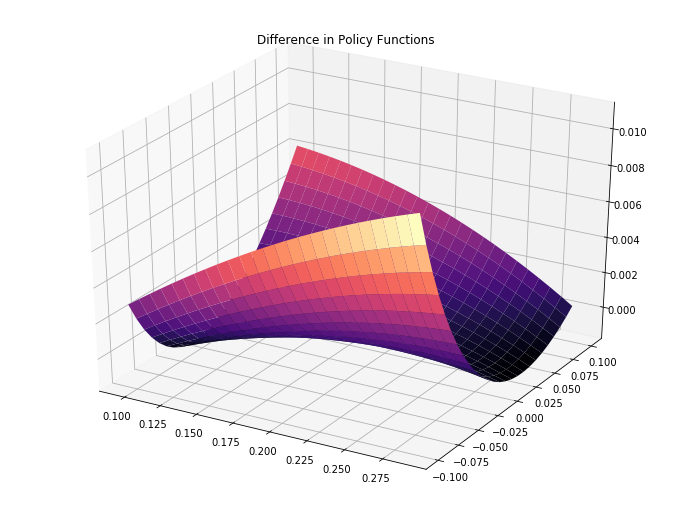

In [65]:
#Imports:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Parameter values:
alpha = 0.35
beta = 0.98
rho = 0.95
sigma = 0.02

#Get steady state values:
k_bar = (alpha * beta) ** (1 / (1 - alpha))
z_bar = 0.0

#Get symbols:
k_double_prime = sy.symbols('k_double_prime')
k_prime = sy.symbols('k_prime')
k = sy.symbols('k')
z_prime = sy.symbols('z_prime')
z = sy.symbols('z')
alpha_sy = sy.symbols('alpha')
beta_sy = sy.symbols('beta')
rho_sy = sy.symbols('rho')
k_bar_sy = sy.symbols('k_bar')

#Define gamma function:
def gamma(k_double_prime, k_prime, k, z_prime, z, alpha_sy, beta_sy):
    numerator = beta_sy * alpha_sy * sy.exp(z_prime) * ((sy.exp(k_prime)) ** (alpha_sy - 1)) * (sy.exp(z) * ((sy.exp(k)) ** alpha_sy) - (sy.exp(k_prime)))
    denominator = sy.exp(z_prime) * ((sy.exp(k_prime)) ** alpha_sy) - (sy.exp(k_double_prime))
    return numerator / denominator

#Get equations for F, G, H, L and M as symbolic derivatives evaluated at the steady state:
F_eq = sy.simplify(sy.diff(gamma(k_double_prime, k_prime, k, z_prime, z, alpha_sy, beta_sy), k_double_prime).subs([(k_double_prime, k_bar_sy), (k_prime, k_bar_sy), (k, k_bar_sy), (z_prime, z_bar), (z, z_bar)]))
G_eq = sy.simplify(sy.diff(gamma(k_double_prime, k_prime, k, z_prime, z, alpha_sy, beta_sy), k_prime).subs([(k_double_prime, k_bar_sy), (k_prime, k_bar_sy), (k, k_bar_sy), (z_prime, z_bar), (z, z_bar)]))
H_eq = sy.simplify(sy.diff(gamma(k_double_prime, k_prime, k, z_prime, z, alpha_sy, beta_sy), k).subs([(k_double_prime, k_bar_sy), (k_prime, k_bar_sy), (k, k_bar_sy), (z_prime, z_bar), (z, z_bar)]))
L_eq = sy.simplify(sy.diff(gamma(k_double_prime, k_prime, k, z_prime, z, alpha_sy, beta_sy), z_prime).subs([(k_double_prime, k_bar_sy), (k_prime, k_bar_sy), (k, k_bar_sy), (z_prime, z_bar), (z, z_bar)]))
M_eq = sy.simplify(sy.diff(gamma(k_double_prime, k_prime, k, z_prime, z, alpha_sy, beta_sy), z).subs([(k_double_prime, k_bar_sy), (k_prime, k_bar_sy), (k, k_bar_sy), (z_prime, z_bar), (z, z_bar)]))

#Get equation for N:
N_eq = rho_sy

#Define P and Q in terms of F, G, H, L, M and N:
def get_P(F, G, H):
    return (-G + (G ** 2 - 4 * F * H) ** 0.5) / (2 * F)

def get_Q(F, G, H, L, M, N):
    return -(L * N + M) / (F * N + F * get_P(F, G, H) + G)

#Get equations for P and Q:
P_eq = sy.simplify(get_P(F_eq, G_eq, H_eq))
Q_eq = sy.simplify(get_Q(F_eq, G_eq, H_eq, L_eq, M_eq, N_eq))
    
print('Equation for F:\nF = {}\n\nEquation for G:\nG = {}\n\nEquation for H:\nH = {}\n\nEquation for L:\nL = {}\n\n'
      'Equation for M:\nM = {}\n\nEquation for N:\nN = {}\n\nEquation for P:\nP = {}\n\nEquation for Q:\nQ = {}\n'.format(F_eq, G_eq, H_eq, L_eq, M_eq, N_eq, P_eq, Q_eq))

#Get values for P and Q:
P = sy.lambdify((k_bar_sy, alpha_sy, beta_sy), P_eq)(k_bar, alpha, beta)
Q = sy.lambdify((k_bar_sy, alpha_sy, beta_sy, rho_sy), Q_eq)(k_bar, alpha, beta, rho)

#Get grids:
k_grid = np.linspace(0.5 * k_bar, 1.5 * k_bar, 26)
z_grid = np.linspace(-5 * sigma, 5 * sigma, 26)
H = np.zeros((26, 26))

#Define policy function:
def pf(k, z):
    return k_bar * np.exp(P * np.log(k / k_bar) + Q * (z - z_bar))

#Update policy function grid:
for i in range(26): #loop over k indices
    for j in range(26): #loop over z indices
        H[i, j] = pf(k_grid[i], z_grid[j])

#Plot policy function:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(k_grid, z_grid)
ax.plot_surface(X, Y, H, cmap='plasma')
plt.title("Log-Linearized Policy Function")
plt.show()

#Plot both policy functions together:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(k_grid, z_grid)
ax.plot_surface(X, Y, H_old, cmap='viridis')
ax.plot_surface(X, Y, H, cmap='plasma')
plt.title("Linearized and Log-Linearized Policy Functions")
plt.show()

#Plot the difference:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(k_grid, z_grid)
ax.plot_surface(X, Y, H_old - H, cmap='magma')
plt.title("Difference in Policy Functions")
plt.show()

# Exercise 3. #

\begin{align*}
E_{t}\left\{F\tilde{X}_{t + 1} + G\tilde{X}_{t} + H\tilde{X}_{t - 1} + L\tilde{Z}_{t + 1} + M\tilde{Z}_{t}\right\} &= E_{t}\left\{F(P(P\tilde{X}_{t - 1} + Q\tilde{Z}_{t}) + Q(N\tilde{Z}_{t} + \epsilon_{t + 1})) + G(P\tilde{X}_{t - 1} + Q\tilde{Z}_{t}) + H\tilde{X}_{t - 1} + L(N\tilde{Z}_{t} + \epsilon_{t + 1}) + M\tilde{Z}_{t}\right\} \\
&= E_{t}\left\{FPP\tilde{X}_{t - 1} + FPQ\tilde{Z}_{t} + FQN\tilde{Z}_{t} + FQ\epsilon_{t + 1} + GP\tilde{X}_{t - 1} + GQ\tilde{Z}_{t} + H\tilde{X}_{t - 1} + LN\tilde{Z}_{t} + L\epsilon_{t + 1} + M\tilde{Z}_{t}\right\} \\
&= E_{t}\left\{FPP\tilde{X}_{t - 1} + GP\tilde{X}_{t - 1} + H\tilde{X}_{t - 1} + FPQ\tilde{Z}_{t} + FQN\tilde{Z}_{t} + GQ\tilde{Z}_{t} + LN\tilde{Z}_{t} + M\tilde{Z}_{t} + FQ\epsilon_{t + 1} + L\epsilon_{t + 1}\right\} \\
&= E_{t}\left\{((FP + G)P + H)\tilde{X}_{t - 1} + ((FQ + L)N + (FP + G)Q + M)\tilde{Z}_{t} + (FQ + L)\epsilon_{t + 1}\right\} \\
&= E_{t}\left\{((FP + G)P + H)\tilde{X}_{t - 1} + ((FQ + L)N + (FP + G)Q + M)\tilde{Z}_{t}\right\} + E_{t}\left\{(FQ + L)\epsilon_{t + 1}\right\} \\
&= ((FP + G)P + H)\tilde{X}_{t - 1} + ((FQ + L)N + (FP + G)Q + M)\tilde{Z}_{t}
\end{align*}

# Exercise 4. #

In [91]:
#Imports:
import numpy as np
from LinApp_FindSS import LinApp_FindSS
from LinApp_Deriv import LinApp_Deriv
from LinApp_Solve import LinApp_Solve

#Model parameter values:
gamma = 2.5
xi = 1.5
beta = 0.98
alpha = 0.4
a = 0.5
delta = 0.1
z_bar = 0.0
rho = 0.9
tau = 0.05
params = np.array([gamma, xi, beta, alpha, a, delta, z_bar, tau])

#LinApp parameter values:
Zbar = np.array([z_bar])
nx = 1
ny = 1
nz = 1
logX = 0
Sylv = 0

#Define Modeldefs and Modeldyn:
def Modeldefs(kp, k, l, z, params):
    gamma, xi, beta, alpha, a, delta, z_bar, tau = params
    w = (1 - alpha) * np.exp(z) * ((k / (l * np.exp(z))) ** alpha)
    r = alpha * (((l * np.exp(z)) / k) ** (1 - alpha))
    T = tau * (w * l + (r - delta) * k)
    c = (1 - tau) * (w * l + (r - delta) * k) + k + T - kp
    y = (k ** alpha) * (l * np.exp(z) ** (1 - alpha))
    i = kp - (1 - delta) * k
    return np.array([w, r, T, c, y, i])

def Modeldyn(theta0, params):
    gamma, xi, beta, alpha, a, delta, z_bar, tau = params
    kpp, kp, k, lp, l, zp, z = theta0
    w, r, T, c, y, i = Modeldefs(kp, k, l, z, params)
    wp, rp, Tp, cp, yp, ip = Modeldefs(kpp, kp, lp, zp, params)
    E1 = cp - (beta * c * ((rp - delta) * (1 - tau) + 1))
    E2 = a * (c ** gamma) - ((1 - l) ** xi) * (w * (1 - tau))
    return np.array([E1, E2])

#Take a guess for steady state values of k and l:
guessXY = np.array([1.0, 0.5])

#Define a function that gets all of the steady state values:
def get_SS_vals(Modeldyn, params, guessXY, Zbar, nx, ny):
    k_bar, l_bar = LinApp_FindSS(Modeldyn, params, guessXY, Zbar, nx, ny)
    w_bar, r_bar, T_bar, c_bar, y_bar, i_bar = Modeldefs(k_bar, k_bar, l_bar, z_bar, params)
    return np.array([k_bar, l_bar, w_bar, r_bar, T_bar, c_bar, y_bar, i_bar])

#Print all the steady state values:
SS_vals = get_SS_vals(Modeldyn, params, guessXY, Zbar, nx, ny)
k_bar, l_bar, w_bar, r_bar, T_bar, c_bar, y_bar, i_bar = SS_vals
print('\nk_bar: ', k_bar, '\nl_bar: ', l_bar, '\nw_bar: ', w_bar, '\nr_bar: ', r_bar, '\nT_bar: ', T_bar, '\nc_bar: ', c_bar, '\ny_bar: ', y_bar, '\ni_bar: ', i_bar)



k_bar:  4.22522902679 
l_bar:  0.579791453167 
w_bar:  1.32795276835 
r_bar:  0.121482277121 
T_bar:  0.0430351603077 
c_bar:  0.860703206155 
y_bar:  1.03183893397 
i_bar:  0.422522902679


# Exercise 5. #

In [92]:
def get_deriv_matrix(SS_vals, Modeldyn, params, guessXY, Zbar, nx, ny):
    deriv_matrix = np.empty((8, 8))
    epsilon = 1e-10
    epsilon_matrix = epsilon * np.identity(8)
    for i in range(8): #loop over x
        new_SS_vals = get_SS_vals(Modeldyn, params + epsilon_matrix[i], guessXY, Zbar, nx, ny)
        for j in range(8): #loop over y
            deriv_matrix[i, j] = (new_SS_vals[j] - SS_vals[j]) / epsilon
    return deriv_matrix

print(get_deriv_matrix(SS_vals, Modeldyn, params, guessXY, Zbar, nx, ny))

[[  1.38671297e-01   1.90325533e-02  -4.44089210e-06   4.16333634e-07
    1.41255063e-03   2.82529555e-02   4.74176254e-02   1.38689060e-02]
 [ -8.01607669e-01  -1.10003118e-01   4.44089210e-06  -6.93889390e-07
   -8.16499646e-03  -1.63309366e-01  -2.74074097e-01  -8.01581024e-02]
 [  6.54305232e+01   2.60150790e-01   7.98735966e+00  -1.09603604e+00
    8.75531592e-02   1.75106152e+00   6.85447255e+00   6.54305499e+00]
 [  2.59849831e+01  -7.69379005e-01   4.39588588e+00  -1.11022302e-06
    1.04260489e-01   2.08520312e+00   2.65601985e+00   2.59849919e+00]
 [ -1.84930293e+00  -2.53758126e-01  -6.66133815e-06   5.55111512e-07
   -1.88354193e-02  -3.76711995e-01  -6.32254249e-01  -1.84927629e-01]
 [ -4.83499107e+01   1.31977651e+00  -7.28750837e+00   1.00000119e+00
   -1.75564771e-01  -3.51129792e+00  -2.37422304e+00  -6.09761130e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [ -2.3232615

# Exercise 6. #